# 9. Clipping and Masking

In [1]:
import draw2Svg as dw

Basic example from [draw2Svg doc](https://draw2svg.netlify.app/other/#clip):

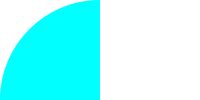

In [3]:
d = dw.Drawing(200, 100, idPrefix='clippy')

clip = dw.ClipPath()
clip.append(dw.Rectangle(0,0,100,100))

# Draw a cropped circle
c = dw.Circle(100,100,100,
                fill="cyan", clip_path=clip,
                id='circle')

d.append(c)
d

Another example:

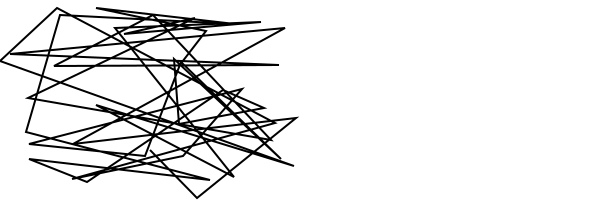

In [19]:
d = dw.Drawing(600,200)

# draw a random path in the left half of the canvas
p = dw.Path(stroke='black',stroke_width=2,fill='none')
p.M(150,150)
from random import randint
for i in range(40):
    p.L(randint(0,300),randint(0,200))
d.append(p)

# circle as clipping shape
circ = dw.Circle(150,100,75)
c = dw.ClipPath()
c.append(circ)

# repeat lines in the right half and apply clipping
d.append(dw.Use(p,300,0,clip_path=c))
d

Complex clip path:

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="300" height="300" viewBox="0 0 300 300">
<defs>
<g id="complex0">
<rect x="0" y="50" width="90" height="60" fill="#999" />
<circle cx="25" cy="25" r="25" fill="#666" />
<path d="M30,0 L80,0 L80,100 Z" fill="#ccc" />
</g>
<clipPath id="complex1">
<path d="M5,55 C25,5,45,-25,75,55 C85,85,20,105,40,55 Z" stroke="black" fill="none" />
</clipPath>
<clipPath id="complex2">
<text x="20" y="20" font-size="48" stroke="black" fill="none" transform="rotate(60)" dy="0em">CLIP</text>
</clipPath>
</defs>
<use xlink:href="#complex0" x="0" y="0" clip-path="url(#complex1)" />
<g transform="translate(100,0)">
<use xlink:href="#complex0" />
<use xlink:href="#complex6" />
</g>
<use xlink:href="#complex0" x="0" y="150" clip-path="url(#complex2)" />
<g transform="translate(100,150)">
<use xlink:href="#complex0" />
<use xlink:href="#complex7" />
</g>
</svg>


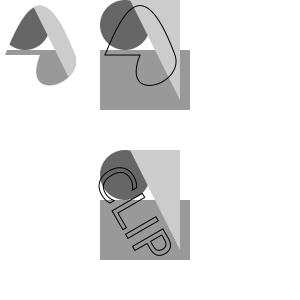

In [50]:
d = dw.Drawing(300,300,idPrefix='complex')

curve1 = dw.Path(stroke='black',fill='none')
curve1.M(5,55).C(25,5, 45,-25, 75,55).C(85,85, 20,105, 40,55).Z()

curveClip = dw.ClipPath()
curveClip.append(curve1)

text1 = dw.Text('CLIP',48,20,20,stroke='black',fill='none',transform='rotate(60)')
textClip = dw.ClipPath()
textClip.append(text1)

shapes = dw.Group()
shapes.append(dw.Rectangle(0,50,90,60,fill='#999'))
shapes.append(dw.Circle(25,25,25,fill='#666'))
shapes.append(dw.Lines(30,0,80,0,80,100,close='true',fill='#ccc'))

# draw shapes with clip path
d.append(dw.Use(shapes,0,0,clip_path=curveClip))

# show clip path
g = dw.Group(transform='translate(100,0)')
g.append(shapes)
g.append(curve1)
d.append(g)

# draw shapes with text as clip path
d.append(dw.Use(shapes,0,150,clip_path=textClip))

# show text clip path
g = dw.Group(transform='translate(100,150)')
g.append(shapes)
g.append(text1)
d.append(g)

print(d.asSvg())
d